# Estadística descriptiva con Python

#### Vamos a leer un conjunto de datos

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
iris = pd.read_csv('iris_data.txt', sep=",")

Cabecera de la tabla para hacernos una idea de cómo es:

In [57]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Dimension del df:

In [58]:
iris.shape

(150, 5)

#### Tipos de datos en Python:
    

In [59]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Más información acerca de mi tabla:

In [60]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


#### Funciones básicas para tratamiento de datos:

Genero un nuevo dataframe a partir del anterior quedándome solo con determinadas columnas:

In [61]:
iris_2 = iris[['sepal_length','sepal_width','species']]
iris_2.head(3) # por defecto sacará los 5 primeros pero yo puedo fijarle el nº por si quiero ver más o menos

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa


In [62]:
#Puedo hacer lo mismo pasando un nombre de variable al DF
columns_names = ['sepal_length','sepal_width','species']
iris_names = iris[columns_names]
iris_names.head(10)

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
5,5.4,3.9,setosa
6,4.6,3.4,setosa
7,5.0,3.4,setosa
8,4.4,2.9,setosa
9,4.9,3.1,setosa


Parar borrar una columna de mi dataframe:

In [63]:
del iris_2['sepal_length']
iris_2.head(3)

,sepal_width,species
0,3.5,setosa
1,3.0,setosa
2,3.2,setosa


In [64]:
#Se puede también borrar con el método .drop()
iris_names_2 = iris_names.drop('sepal_length',axis=1)
iris_names_2.head()

,sepal_width,species
0,3.5,setosa
1,3.0,setosa
2,3.2,setosa
3,3.1,setosa
4,3.6,setosa


Para borrar el dataframe completo:

In [65]:
del iris_2

Para quedarme solo con los elementos del dataframe que cumplen una condición:

In [66]:
iris_2 = iris[iris['species'] == 'setosa']
iris_2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
iris_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
sepal_length    50 non-null float64
sepal_width     50 non-null float64
petal_length    50 non-null float64
petal_width     50 non-null float64
species         50 non-null object
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [68]:
iris_2.shape

(50, 5)

Arriba me he quedado solo con aquellas cuya especie es setosa. 

Ahora voy a quedarme con las setosa que además tengan una anchura de pétalo <= 0.2

In [69]:
iris_2 = iris[(iris['species'] == 'setosa')&(iris['petal_width']<=0.2)]
#iris_2 = iris[(iris.species == 'setosa')&(iris.petal_width<=0.2)] #se pueden tb referenciar las vblescon punto
iris_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 49
Data columns (total 5 columns):
sepal_length    34 non-null float64
sepal_width     34 non-null float64
petal_length    34 non-null float64
petal_width     34 non-null float64
species         34 non-null object
dtypes: float64(4), object(1)
memory usage: 1.6+ KB


In [70]:
iris_punto = iris[(iris.species=='setosa') & (iris.petal_width <=0.1)]
iris_punto.head()

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
12,4.8,3.0,1.4,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
32,5.2,4.1,1.5,0.1,setosa
34,4.9,3.1,1.5,0.1,setosa


In [71]:
iris_punto.shape

(6, 5)

Si quiero quedarme con todas las columnas menos una específica:

In [72]:
iris.drop('species', axis=1).head()
#OJO: esto no modifica "iris". Solo lo modifica si activamos la opción "Inplace"

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [73]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Otra opción que hace lo mismo:

In [74]:
select=[x for x in iris.columns if x not in ["species"]]
# select=[x for x in iris.columns if x not in ["sepal_length",species"]] #Si quisiera quitar 2 por ejemplo
iris_2 = iris.loc[:,select].head(2)
iris_2

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


### Tabla de frecuencias:

Vamos a generarla para la variable petal_width

Vemos antes de nada cómo es esta variable:

In [75]:
iris['petal_width'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

Esta variable la vamos a categorizar convirtiéndola en una con tres categorías:
    - que el valor sea <=1
    - que el valor esté entre 1 y 2
    - que el valor sea >= 2
sabiendo que el mínimo es 1 y el máximo 2.5.

In [76]:
iris['pw_cat'] = 'empty'
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pw_cat
0,5.1,3.5,1.4,0.2,setosa,empty
1,4.9,3.0,1.4,0.2,setosa,empty
2,4.7,3.2,1.3,0.2,setosa,empty
3,4.6,3.1,1.5,0.2,setosa,empty
4,5.0,3.6,1.4,0.2,setosa,empty


In [79]:
iris.loc[(iris.petal_width <= 1),'pw_cat'] = '1. <= 1'
iris.loc[((iris.petal_width > 1) & (iris.petal_width < 2)),'pw_cat'] = '2. 1-2'
iris.loc[(iris.petal_width >= 2),'pw_cat'] = '3. >= 2'

In [91]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pw_cat
0,5.1,3.5,1.4,0.2,setosa,1. <= 1
1,4.9,3.0,1.4,0.2,setosa,1. <= 1
2,4.7,3.2,1.3,0.2,setosa,1. <= 1
3,4.6,3.1,1.5,0.2,setosa,1. <= 1
4,5.0,3.6,1.4,0.2,setosa,1. <= 1


Vemos cómo queda ahora el dataframe con la nueva variable:

Ahora voy a crear la tabla de frecuencias. 
En particular, calculo las frecuencias absolutas:

In [124]:
#OJO: No es necesario indicar 'index' y 'columns' en 'crosstab'

frecuencias = pd.crosstab(index=iris['pw_cat'],columns="frec_abs")

#frecuencias = iris.groupby("nueva_variable").size().reset_index(name='frec_abs')
#frecuencias = pd.value_counts(iris['nueva_variable'])

frecuencias

col_0,frec_abs
pw_cat,
1. <= 1,57
2. 1-2,64
3. >= 2,29


In [99]:
type(frecuencias)

pandas.core.frame.DataFrame

In [98]:
frecuencias.dtypes

col_0
frec_abs    int64
dtype: object

In [102]:
frecuencias.shape

(3, 1)

In [104]:
#Otra manera de hacer lo mismo, pero el resultado es una Serie, no un DF

freq = iris.pw_cat.value_counts()
freq

2. 1-2     64
1. <= 1    57
3. >= 2    29
Name: pw_cat, dtype: int64

In [105]:
type(freq)

pandas.core.series.Series

Añado las frecuencias relativas:

In [106]:
frecuencias['frec_rel'] = iris['pw_cat'].value_counts() / len(iris['pw_cat'])

In [107]:
frecuencias

col_0,frec_abs,frec_rel
pw_cat,,
1. <= 1,57,0.380000
2. 1-2,64,0.426667
3. >= 2,29,0.193333


In [108]:
#MUCHO OJO CON ESTO: al no ser freq un DF, "freq['frec_rel']" se añade al final de la serie y no funciona

freq['frec_rel'] = iris['pw_cat'].value_counts() / len(iris['pw_cat'])

In [113]:
freq

2. 1-2                                                     64
1. <= 1                                                    57
3. >= 2                                                    29
frec_rel    2. 1-2     0.426667
1. <= 1    0.380000
3. >= ...
Name: pw_cat, dtype: object

In [110]:
type(freq)

pandas.core.series.Series

In [111]:
freq.shape

(4,)

Añado las frecuencias porcentuales:

In [114]:
frecuencias['frec_por'] = 100* frecuencias['frec_rel']
frecuencias

col_0,frec_abs,frec_rel,frec_por
pw_cat,,,
1. <= 1,57,0.380000,38.000000
2. 1-2,64,0.426667,42.666667
3. >= 2,29,0.193333,19.333333


In [115]:
frecuencias_acum = frecuencias[["frec_abs","frec_rel"]].cumsum().rename(columns={"frec_abs":"frec_abs_acum","frec_rel":"frec_rel_acum"})
print(frecuencias_acum)
#Esto sería haciendo también el acumulado de frec_por
#frecuencias_acum = frecuencias.cumsum().rename(columns={"frec_abs":"frec_abs_acum","frec_rel":"frec_rel_acum", "frec_por":"frec_por_acum"})

col_0    frec_abs_acum  frec_rel_acum
pw_cat                               
1. <= 1           57.0       0.380000
2. 1-2           121.0       0.806667
3. >= 2          150.0       1.000000


In [117]:
tabla_frecuencias = pd.concat([frecuencias, frecuencias_acum], axis=1)
tabla_frecuencias

col_0,frec_abs,frec_rel,frec_por,frec_abs_acum,frec_rel_acum
pw_cat,,,,,
1. <= 1,57,0.380000,38.000000,57.0,0.380000
2. 1-2,64,0.426667,42.666667,121.0,0.806667
3. >= 2,29,0.193333,19.333333,150.0,1.000000


### $\color{red}{\text{Ejercicio 2: Calcular frecuencias absolutas y relativas combinadas de dos variables.}}$

Frecuencias absolutas:

In [118]:
tab = pd.crosstab(iris["species"],iris["pw_cat"],margins=True) # margins si queremos generar la fila y columna All
#total = tab["All"][:-1]
#winner = total.idxmax()
tab

pw_cat,1. <= 1,2. 1-2,3. >= 2,All
species,,,,
setosa,50,0,0,50
versicolor,7,43,0,50
virginica,0,21,29,50
All,57,64,29,150


Ahora en tanto por uno por fila (ojo, por fila de "iris", lo que implica que hace la suma de las columnas, por eso es axis=1):

In [119]:
pd.crosstab(iris["species"],iris['pw_cat']).apply(lambda r: r/r.sum(), axis=1)
#pd.crosstab(iris["species"],iris["pw_cat"], normalize='index') # Otra opción

pw_cat,1. <= 1,2. 1-2,3. >= 2
species,,,
setosa,1.00,0.00,0.00
versicolor,0.14,0.86,0.00
virginica,0.00,0.42,0.58


Tanto por uno por columnas:

In [120]:
pd.crosstab(iris["species"],iris["pw_cat"]).apply(lambda r: r/r.sum(), axis=0)

pw_cat,1. <= 1,2. 1-2,3. >= 2
species,,,
setosa,0.877193,0.000000,0.0
versicolor,0.122807,0.671875,0.0
virginica,0.000000,0.328125,1.0


Tanto por uno del total de la tabla:

In [121]:
pd.crosstab(iris["species"],iris["pw_cat"]).apply(lambda r: r/len(iris), axis=1)

pw_cat,1. <= 1,2. 1-2,3. >= 2
species,,,
setosa,0.333333,0.000000,0.000000
versicolor,0.046667,0.286667,0.000000
virginica,0.000000,0.140000,0.193333


In [ ]:
##consultar vbles declaradas
#dir()
#
##borrar
#%reset -f
#del(vble)

### Medidas de posición centrales:

Vamos a calcular la media y la mediana de la variable "sepal_length" y la moda de la variable "species"

In [125]:
iris[["sepal_length"]].mean()

sepal_length    5.843333
dtype: float64

In [126]:
iris[["sepal_length"]].median()

sepal_length    5.8
dtype: float64

Parece que los valores de la media y la mediana son muy próximos.

In [127]:
iris[["species"]].mode()

,species
0,setosa
1,versicolor
2,virginica


¿Qué está pasando?

Vamos a sacarnos una tabla con el número de registros de cada clase para ver por qué no me está sacando el que más se repite:

In [128]:
pd.value_counts(iris['species'])

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

Es una variable trimodal (tiene 3 modas)

Veamos cuál es la moda de la variable que creamos para categorizar nuestra vble original "petal_width"

In [129]:
iris[["pw_cat"]].mode()

,pw_cat
0,2. 1-2


Esta variable sí que tiene una única moda.

### Medidas de posición no centrales:

Veamos los cuartiles:

In [130]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Donde: 
- cuartil 1 se corresponde con el 25%, 
- cuartil 2 con el 50%, que a su vez es la mediana, 
- cuartil 3 con el 75% y 
- cuartil 4 con el max

Vemos por tanto que de esta forma, además de los cuartiles, también obtenemos la media (mean) y la mediana (50%) de forma directa.

Calculemos los percentiles:

In [131]:
iris.quantile(0.25)

sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 0.25, dtype: float64

En numpy también tenemos una función para esto. Veamos el percentil 25 para sepal_length:

In [132]:
q25 = np.percentile(iris[['sepal_length']], [25])
print(q25)

[5.1]


### $\color{red}{\text{Ejercicio 3: Calcular el Rango Intercuartílico de cada variable.}}$

Utilizando la función de numpy que acabamos de ver, calculémoslo para la variable sepal_length:

In [133]:
q75, q25 = np.percentile(iris[['sepal_length']], [75 ,25])
q25
iqr = q75 - q25
print(iqr)

1.3000000000000007


Esta opción es mejor, al obtenerse los rangos intercuartílicos de todas las variables (no como en el caso de arriba)

In [134]:
rango_inter = iris.quantile(0.75)-iris.quantile(0.25)
rango_inter

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

### Medidas de dispersión:

Calculamos el rango de la variable 'sepal_length':

In [135]:
iris[['sepal_length']].max() - iris[['sepal_length']].min()

sepal_length    3.6
dtype: float64

Calculamos la varianza de la variable 'sepal_length':

In [136]:
iris[['sepal_length']].var()

sepal_length    0.685694
dtype: float64

Calculamos la desviación típica de la variable 'sepal_length':

In [137]:
iris[['sepal_length']].std()

sepal_length    0.828066
dtype: float64

Podemos además representar las variables gráficamente utilizando un boxplot, para tener una visión de cómo de dispersas están nuestras variables.

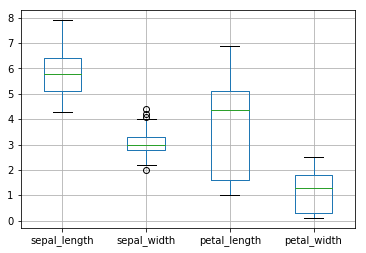

In [138]:
boxplot = iris.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
boxplot

### $\color{red}{\text{Ejercicio 4: Calcular rango, varianza y desviación típica de cada variable.}}$

In [148]:
#Primero se eliminan las variables cualitativas
iris_variables = iris.drop(['species','pw_cat'],axis=1)
iris_variables
iris_variables.max()-iris_variables.min()

sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64

In [149]:
iris.var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [150]:
iris.std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

### $\color{red}{\text{Ejercicio 5: Calcular el coeficiente de variación de Pearson de cada variable para concluir cuál es la que presenta menor variación con respecto a las demás.}}$

Manera fácil de hacerlo

In [152]:
iris.std()/iris.mean()

sepal_length    0.141711
sepal_width     0.141976
petal_length    0.469427
petal_width     0.636675
dtype: float64

Manera larga de hacerlo

In [154]:
iris.sepal_length.std()/iris.sepal_length.mean()

0.1417112597794403

In [155]:
iris.sepal_width.std()/iris.sepal_width.mean()

0.1419758714348964

In [156]:
iris.petal_length.std()/iris.petal_length.mean()

0.4694272135382034

In [157]:
iris.petal_width.std()/iris.petal_width.mean()

0.63667470108524

### Medidas de forma:

Vamos a calcular el coeficiente de asimetría de cada una de las variables mediante la función 'skew':

In [158]:
iris.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

Vamos a calcular la curtosis de cada variable con el método .kurt(). 
<br>Este método resta 3 automáticamente, de manera que la comparación la hacemos con 0 o le podemos sumar 3 y comparar como habíamos especificado antes con 3.

In [159]:
iris.kurt()

sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
dtype: float64

### $\color{red}{\text{Ejercicio 6: Representar gráficamente las distribuciones de estas variables marcando dónde están su media y su mediana.}}$

Lo voy a pintar para sepal_length haciendo uso de la librería seaborn:

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


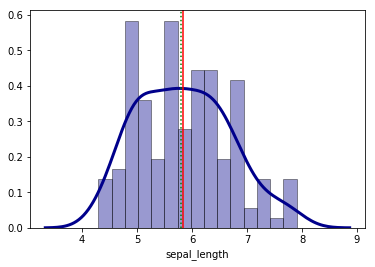

In [160]:
sns.distplot(iris['sepal_length'], hist=True, kde=True, 
             bins=15, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.axvline(iris['sepal_length'].mean(),color='r', linestyle='-')
plt.axvline(iris['sepal_length'].median(),color='g', linestyle=':')

Ahora, usando plt, vamos a pintar los cuatro gráficos juntos, uno por variable:

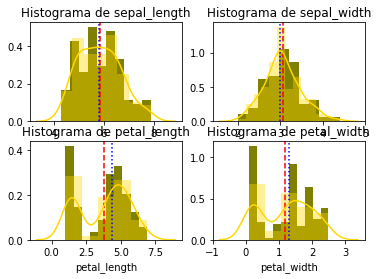

In [161]:

for i, columna in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    
    ax = plt.subplot(2,2,i+1)

    ax.hist(iris[columna], color = 'olive', density=True)
    ax.axvline(iris[columna].mean(),color='r', linestyle='--')
    ax.axvline(iris[columna].median(),color='b', linestyle=':')
    ax.set_title('Histograma de %s' % columna)
    
    sns.distplot(iris[columna], color="gold")

### Correlación entre variables:

In [162]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


El test de pearson mide la correlación (primer valor obtenido) devolviendo además el p-valor para ver si se puede aceptar o rechazar correlación según los test de hipótesis que hemos visto (segundo valor)

In [163]:
import scipy.stats as ss
ss.pearsonr(iris.sepal_length, iris.sepal_width)

(-0.10936924995064935, 0.1827652152713665)

Representemos visualmente la correlación existente entre sepal_length y sepal_width con un gráfico de dispersión.
<br> Para ello vamos a cargar la libreria matplotlib

In [164]:
import matplotlib.pyplot as plt

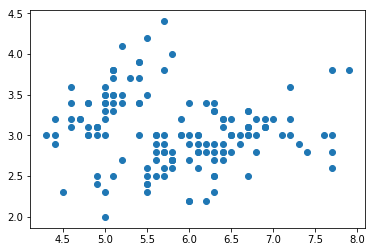

In [165]:
fig, ax = plt.subplots()
ax.scatter(iris.sepal_length, iris.sepal_width)
plt.show()

Ni a través del coeficiente ni gráficamente se aprecia relación entre estas dos variables. 
<br> Intentemos representarlo de nuevo pero distinguiendo según la especie.

In [166]:
# Creamos el vector de colores, para que, en función de la vble class pinte los puntos de un color u otro
colores = {"setosa":"RoyalBlue", "versicolor":"Crimson","virginica":"DarkGreen"}
class_colores = iris['species'].map(colores)

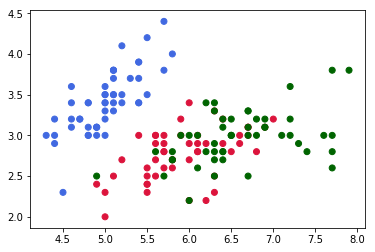

In [167]:
fig, ax = plt.subplots()
ax.scatter(iris.sepal_length, iris.sepal_width, color=class_colores)
plt.show()

Vamos a añadirle la leyenda para saber de qué especie o clase estamos hablando en cada caso:

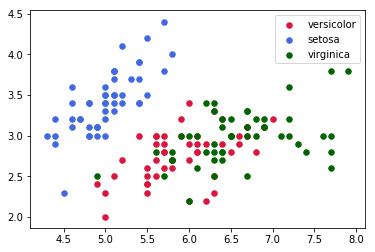

In [168]:
fig, ax = plt.subplots()
for species in set(iris['species']):
    ax.scatter(
        iris.sepal_length[iris.species == species],
        iris.sepal_width[iris.species == species],
        s = 30,
        c = colores[species],
        label = species)
plt.legend()
plt.show()

In [169]:
iris[iris.species == "setosa"].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_length,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000
